In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

# Glossary of Dataset

In [2]:
# ArrDelay (how early/late the plane was at its final destination in minutes: our target variable)
# ActualElapsedTime: elapsed time of flight, in minutes
# AirTime: flight time, in minutes
# ArrDelay, DepDelay: arrival and departure delays, in minutes

# CRSDepTime (the local time the plane was scheduled to depart)
# CRSArrTime (the local time the plane was scheduled to arrive)
# CRSElapsedTime (the scheduled difference between departure and arrival
# Cancelled: cancelled indicator: 1 = Yes, 0 = No
# CancellationCode: reason for cancellation: A = carrier, B = weather, C = national air system, D = security


# Distance (how far did the plane travel for the route)
# DayOfWeek: day of week of departure, a value of 1-5 means that it is a weekday, a value of 6-7 means that it is a weekend day
# DepTime, ArrTime: departure and arrival times (in local time, hhmm)
# Distance: distance of flight, in miles
# Diverted: diverted indicator: 1 = Yes, 0 = No


# FlightNum: flight number



# Origin, Dest: origin and destination airport codes

# TailNum: airplane tail number
# TaxiIn, TaxiOut: taxi in and out times in minutes


# UniqueCarrier: unique abbreviation for a carrier

# Year, Month, DayofMonth: date of departure

# Reading and exploring Dataset

In [3]:
# df=pd.read_csv('DelayedFlights.csv')
# df2=pd.read_csv('airlines.csv')
# df3=pd.read_csv('airports.csv')

In [3]:
df=pd.read_csv("D:\\ML\\Project\\Final\\DelayedFlights.csv")
df.head(4)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0


In [4]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


# Check for null values

In [5]:
df.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

# Dropping columns having more than 70% null values

In [6]:
df_new=df.dropna(thresh=df.shape[0]*0.3,how='all',axis=1)
df_new.shape

(1936758, 30)

In [7]:
df_new.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

# Seperating Categorical and Numerical Features

In [8]:
df_cat = df_new.select_dtypes(exclude = ['int64','float64'])
df_num = df_new.select_dtypes(include = ['int64','float64'])

In [9]:
df_cat.shape,df_num.shape

((1936758, 5), (1936758, 25))

In [10]:
df_num.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
FlightNum                 0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

# Imputing Null Values

In [11]:
df_num_new=df_num.fillna({'ActualElapsedTime':df_num['ActualElapsedTime'].mean(),'CRSElapsedTime':df_num['CRSElapsedTime'].mean(),
                         'AirTime':df_num['AirTime'].mean(),'ArrDelay':df_num['ArrDelay'].mean(),'TaxiIn':df_num['TaxiIn'].mean(),
                         'TaxiOut':df_num['TaxiOut'].mean(),'CarrierDelay':df_num['CarrierDelay'].mean(),
                          'WeatherDelay':df_num['WeatherDelay'].mean(),'NASDelay':df_num['NASDelay'].mean(),
                         'SecurityDelay':df_num['SecurityDelay'].mean(),'LateAircraftDelay':df_num['LateAircraftDelay'].mean()})

In [12]:
df_num_new2=df_num_new.drop(['ArrTime'],axis=1)

In [13]:
df_num_new2.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [16]:
df_num_new2.isnull().sum().sum()

0

In [15]:
df_cat.isnull().sum()

UniqueCarrier       0
TailNum             5
Origin              0
Dest                0
CancellationCode    0
dtype: int64

In [17]:
df_cat1=df_cat.drop(['UniqueCarrier','TailNum','Origin','Dest'],axis=1)


In [18]:
df_cat1.isnull().sum()

CancellationCode    0
dtype: int64

# Encoding categorigal Variables

In [19]:
cat_encoded=pd.get_dummies(data=df_cat1,columns=['CancellationCode'])

# Combining the dataframe

In [20]:
df_final=pd.concat([cat_encoded,df_num_new2],axis=1)
df_final.shape

(1936758, 28)

In [21]:
df_final.head()

,CancellationCode_A,CancellationCode_B,CancellationCode_C,CancellationCode_N,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,0,0,1,0,2008,1,3,4,2003.0,...,810,4.0,8.0,0,0,19.179399,3.703571,15.021635,0.090137,25.296466
1,0,0,0,1,1,2008,1,3,4,754.0,...,810,5.0,10.0,0,0,19.179399,3.703571,15.021635,0.090137,25.296466
2,0,0,0,1,2,2008,1,3,4,628.0,...,515,3.0,17.0,0,0,19.179399,3.703571,15.021635,0.090137,25.296466
3,0,0,0,1,4,2008,1,3,4,1829.0,...,515,3.0,10.0,0,0,2.000000,0.000000,0.000000,0.000000,32.000000
4,0,0,0,1,5,2008,1,3,4,1940.0,...,688,4.0,10.0,0,0,19.179399,3.703571,15.021635,0.090137,25.296466


In [22]:
df_final.isnull().sum().sum()

0

# EDA

# Proportion of USCarrier in the dataset

In [23]:
len(df['UniqueCarrier'].unique())

20

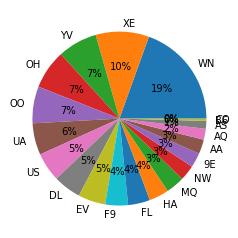

In [24]:
fig_dim=(20,20)
airline=df['UniqueCarrier'].unique()
size=df['UniqueCarrier'].value_counts()
plt.pie(size,labels=airline,autopct='%1.0f%%')
plt.show()

# Flights that got cancelled

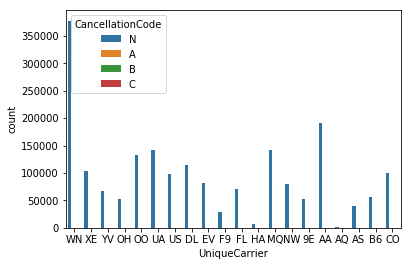

In [25]:
sns.countplot(x='UniqueCarrier',hue='CancellationCode',data=df_new)

<Figure size 1080x360 with 0 Axes>

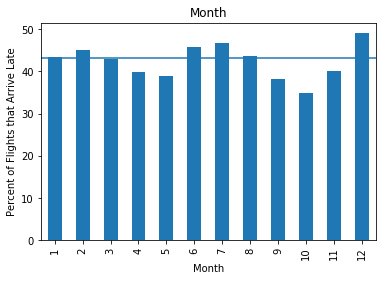

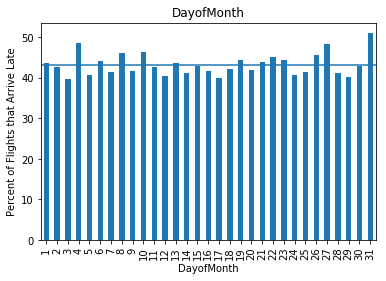

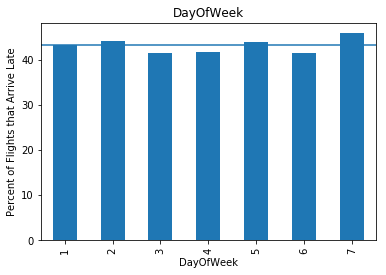

In [26]:
# Proportion of late flights per category based on all other flights
# enumerate(attributes) means print(list(attributes))[function takes a collection (e.g. a tuple) and returns it as an enumerate object.]
avgLate = np.sum(df_final['DepDelay'])/len(df_final['DepDelay'])
attributes = ['Month','DayofMonth','DayOfWeek']
for i,pred in enumerate(attributes):
    plt.figure(i, figsize=(15, 5))
    group = df_new.groupby([pred], as_index=False).aggregate(np.mean)[[pred, 'DepDelay']]
    group.sort_values(by=pred, inplace=True)    
    group.plot.bar(x=pred, y='DepDelay')
    plt.axhline(y=avgLate, label='Average')
    plt.ylabel('Percent of Flights that Arrive Late')
    plt.title(pred)
    plt.legend().remove()

# Flights that got cancelled

In [27]:
##Here we simply select all the rows with cancelled flights and insert them into their own dataframe
cancelled = df_new[df_new['Cancelled']==1]

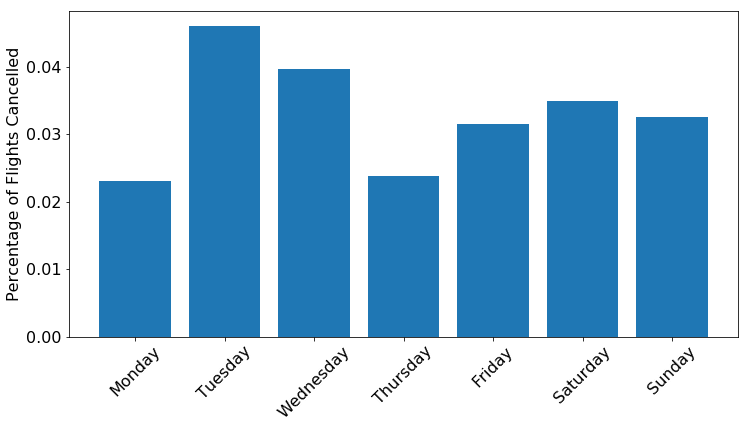

In [28]:
font = {'size'   : 16}
plt.rc('font', **font)### pass in the font dict as kwargs

days_cancelled = cancelled['Cancelled'].groupby(df_final['DayOfWeek']).count()
days_total = df_final['Cancelled'].groupby(df_final['DayOfWeek']).count()
days_frac = np.divide(days_cancelled, days_total)
x=days_frac.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(x,days_frac*100, align='center')
ax.set_ylabel('Percentage of Flights Cancelled')
ax.set_xticks(x)
ax.set_xticklabels(week, rotation = 45)

plt.show()

# Feature Selection

In [29]:
df_final.columns

Index(['CancellationCode_A', 'CancellationCode_B', 'CancellationCode_C',
       'CancellationCode_N', 'Unnamed: 0', 'Year', 'Month', 'DayofMonth',
       'DayOfWeek', 'DepTime', 'CRSDepTime', 'CRSArrTime', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

In [30]:
dff=df_final.drop(['Unnamed: 0', 'Year', 'Month', 'DayofMonth',
       'DayOfWeek', 'DepTime','FlightNum'],axis=1)


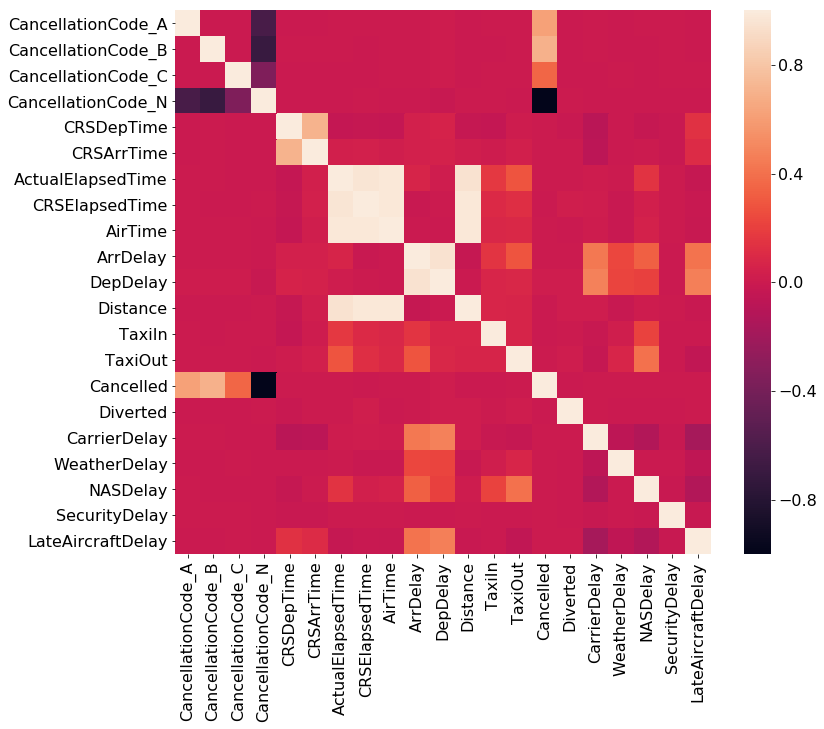

In [31]:
plt.figure(figsize=(12,10))
cor=dff.corr()
sns.heatmap(cor)
plt.show()

In [32]:
cor

,CancellationCode_A,CancellationCode_B,CancellationCode_C,CancellationCode_N,CRSDepTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
CancellationCode_A,1.000000e+00,-1.419134e-04,-7.243922e-05,-6.233361e-01,-0.002344,-0.001728,-3.995609e-18,0.000096,2.386513e-17,-2.730221e-18,...,-0.000430,5.249894e-17,0.000706,6.233361e-01,-7.145848e-04,3.451410e-16,-1.780198e-16,1.949266e-15,5.203939e-17,-2.903811e-16
CancellationCode_B,-1.419134e-04,1.000000e+00,-8.092491e-05,-6.963551e-01,0.002642,0.002456,5.921485e-17,-0.004127,4.341854e-17,-4.103585e-17,...,-0.005168,-9.931148e-16,0.001855,6.963551e-01,-7.982929e-04,5.838078e-16,-1.228114e-15,-2.092821e-15,5.441756e-16,-3.467257e-16
CancellationCode_C,-7.243922e-05,-8.092491e-05,1.000000e+00,-3.554521e-01,-0.000999,-0.001216,-9.920478e-17,-0.003098,8.704166e-17,-2.616243e-19,...,-0.003353,3.482518e-16,0.001011,3.554521e-01,-4.074859e-04,-2.670208e-16,3.583056e-17,-8.375067e-16,2.508178e-16,9.341265e-17
CancellationCode_N,-6.233361e-01,-6.963551e-01,-3.554521e-01,1.000000e+00,-0.000023,-0.000201,-7.573339e-17,0.003916,-3.090744e-16,-2.462409e-16,...,0.005060,5.988769e-15,-0.002091,-1.000000e+00,1.146388e-03,-1.221420e-15,-2.880507e-16,-4.205952e-16,-1.125586e-15,-1.358429e-16
CRSDepTime,-2.344105e-03,2.641653e-03,-9.993628e-04,-2.305380e-05,1.000000,0.710303,-3.484595e-02,-0.026387,-3.649897e-02,4.434680e-02,...,-0.029517,-3.231827e-02,0.011407,2.305380e-05,-9.096035e-03,-8.541723e-02,-7.431151e-03,-2.602259e-02,-1.357936e-02,1.334802e-01
CRSArrTime,-1.728126e-03,2.455603e-03,-1.215710e-03,-2.005906e-04,0.710303,1.000000,3.313074e-02,0.040112,2.585053e-02,4.298414e-02,...,0.024335,1.379330e-02,0.037938,2.005906e-04,9.065719e-04,-7.669054e-02,-4.013853e-03,7.359174e-03,-1.064682e-02,1.048530e-01
ActualElapsedTime,-3.995609e-18,5.921485e-17,-9.920478e-17,-7.573339e-17,-0.034846,0.033131,1.000000e+00,0.967599,9.766600e-01,6.812970e-02,...,0.949931,1.661182e-01,0.288367,1.244197e-17,3.709352e-16,8.038548e-03,3.281307e-03,1.429387e-01,4.615418e-03,-2.760090e-02
CRSElapsedTime,9.603212e-05,-4.126748e-03,-3.098361e-03,3.915927e-03,-0.026387,0.040112,9.675992e-01,1.000000,9.825087e-01,-1.561962e-02,...,0.981742,9.937646e-02,0.123815,-3.915927e-03,2.434413e-02,2.079714e-02,-1.288961e-02,3.673763e-02,4.774917e-03,-9.061788e-03
AirTime,2.386513e-17,4.341854e-17,8.704166e-17,-3.090744e-16,-0.036499,0.025851,9.766600e-01,0.982509,1.000000e+00,-1.889261e-04,...,0.977158,8.380996e-02,0.090023,-5.481650e-17,-4.817395e-16,1.561430e-02,-1.463875e-02,5.016042e-02,5.715933e-03,-1.757160e-02
ArrDelay,-2.730221e-18,-4.103585e-17,-2.616243e-19,-2.462409e-16,0.044347,0.042984,6.812970e-02,-0.015620,-1.889261e-04,1.000000e+00,...,-0.029757,1.560609e-01,0.285296,3.464519e-17,4.979952e-17,4.317916e-01,2.277170e-01,3.335476e-01,-2.141391e-03,4.114399e-01


In [33]:
cor_target = cor["DepDelay"]
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

ArrDelay             0.948431
DepDelay             1.000000
CarrierDelay         0.475102
WeatherDelay         0.219978
NASDelay             0.210520
LateAircraftDelay    0.461608
Name: DepDelay, dtype: float64

In [35]:
cor["DepDelay"]

CancellationCode_A    0.012919
CancellationCode_B    0.008169
CancellationCode_C    0.007870
CancellationCode_N   -0.016542
CRSDepTime            0.058875
CRSArrTime            0.053706
ActualElapsedTime     0.018405
CRSElapsedTime        0.007001
AirTime              -0.002740
ArrDelay              0.948431
DepDelay              1.000000
Distance             -0.007718
TaxiIn                0.074430
TaxiOut               0.078635
Cancelled             0.016542
Diverted              0.022867
CarrierDelay          0.475102
WeatherDelay          0.219978
NASDelay              0.210520
SecurityDelay        -0.002108
LateAircraftDelay     0.461608
Name: DepDelay, dtype: float64

# Model Building - train

In [36]:
x=dff[['ArrDelay','CarrierDelay','WeatherDelay','NASDelay','LateAircraftDelay']]
y=dff[['DepDelay']]

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [38]:
from sklearn.metrics import r2_score,mean_squared_error

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10)
model=LinearRegression().fit(X_train,Y_train)

model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Train set

In [41]:
pred_train = model.predict(X_train) # prediction on train data
print(r2_score(Y_train,pred_train)) # r2 score of train set

0.9231462363422898


In [42]:
mean_squared_error(Y_train,pred_train)

219.05523313449123

# Test set

In [43]:
pred_test = model.predict(X_test) # prediction on test data
print(r2_score(Y_test,pred_test)) # r2 score of test set

0.9226756073145206


In [44]:
mean_squared_error(Y_test,pred_test)

220.99168363533346

Text(0.5, 1.0, 'NASDelay')

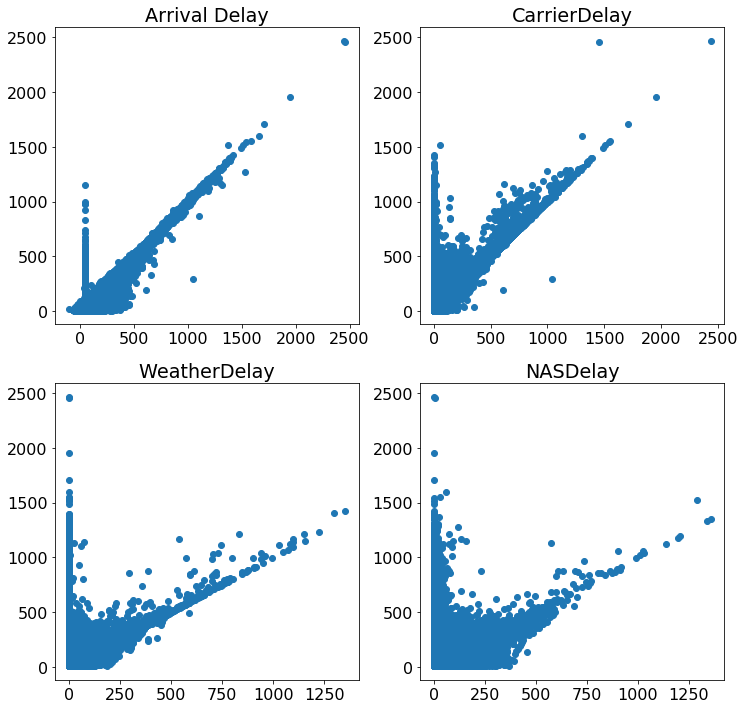

In [43]:
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
plt.scatter(df_num_new2['ArrDelay'],df_num_new2['DepDelay'])
plt.title('Arrival Delay')
plt.subplot(2,2,2)
plt.scatter(df_num_new2['CarrierDelay'],df_num_new2['DepDelay'])
plt.title('CarrierDelay')
plt.subplot(2,2,3)
plt.scatter(df_num_new2['WeatherDelay'],df_num_new2['DepDelay'])
plt.title('WeatherDelay')
plt.subplot(2,2,4)
plt.scatter(df_num_new2['NASDelay'],df_num_new2['DepDelay'])
plt.title('NASDelay')

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [46]:
lst = [1,2,[3,4],[5,[100,200,['hello']],23,11],1,7]
print(lst[3][1][2][0][4])   

o


In [22]:
x=('a')
type(x)

str

In [23]:
x=('a'),
type(x)

tuple

In [21]:
 x='a'
type(x)

str

In [14]:
s="abc DEF" 
# l.capitalize()
# l.title
s[0].upper()+s[1:].lower()

'Abc def'

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
pre_gb_model=GradientBoostingRegressor(warm_start=True)#always I'd like to use the warm_start parameter to add training data to my random forest classifier
pre_gb_model.fit(X_train,Y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=True)

In [48]:
y_pred_probs = pre_gb_model.predict(X_test)

In [49]:
mean_squared_error(Y_test,y_pred_probs)

140.09957623753

In [50]:
r2_score(Y_test,y_pred_probs)

0.9509795370130935

In [51]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor(warm_start=True)
xgb_model.fit(X_train,Y_train)

[22:36:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1, warm_start=True)

In [52]:
y_pred_probs = xgb_model.predict(X_test)

In [53]:
mean_squared_error(Y_test,y_pred_probs)

141.18363588466968

In [54]:
r2_score(Y_test,y_pred_probs)

0.9506002274731552

In [55]:
from lightgbm import LGBMRegressor
lgbm_model=LGBMRegressor(warm_start=True)
lgbm_model.fit(X_train,Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
              warm_start=True)

In [56]:
y_pred_probs = lgbm_model.predict(X_test)

In [57]:
mean_squared_error(Y_test,y_pred_probs)

135.39414570543954

In [58]:
r2_score(Y_test,y_pred_probs)

0.9526259544358323